In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [ ]:
calories = pd.read_csv("calories.csv")
exercise = pd.read_csv("exercise.csv")

In [ ]:
df = pd.concat([exercise,calories['Calories']],axis=1)

In [40]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


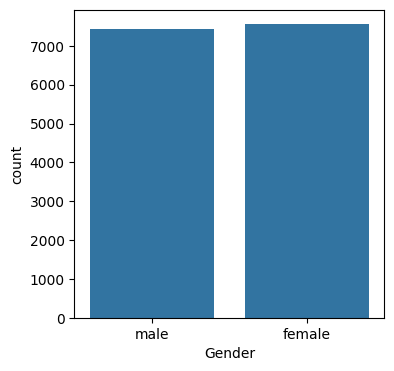

In [28]:
plt.figure(figsize=(4,4))
sns.countplot(x= 'Gender', data= df)
plt.show()

In [30]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


# Print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 8 numerical features : ['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

We have 1 categorical features : ['Gender']


In [31]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percent
User_ID,0,0.0
Gender,0,0.0
Age,0,0.0
Height,0,0.0
Weight,0,0.0
Duration,0,0.0
Heart_Rate,0,0.0
Body_Temp,0,0.0
Calories,0,0.0


<Figure size 400x400 with 0 Axes>

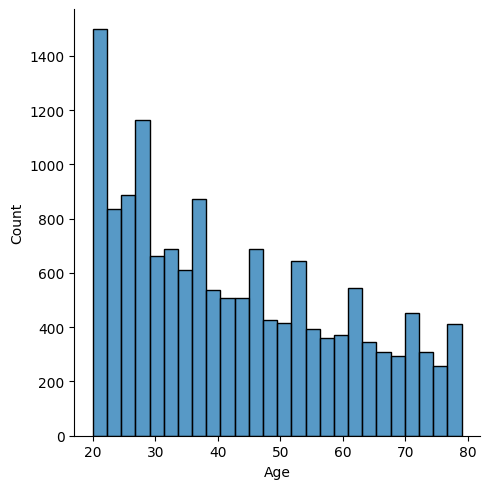

In [32]:
plt.figure(figsize=(4,4))
sns.displot(df['Age'])
plt.show()

<Figure size 400x400 with 0 Axes>

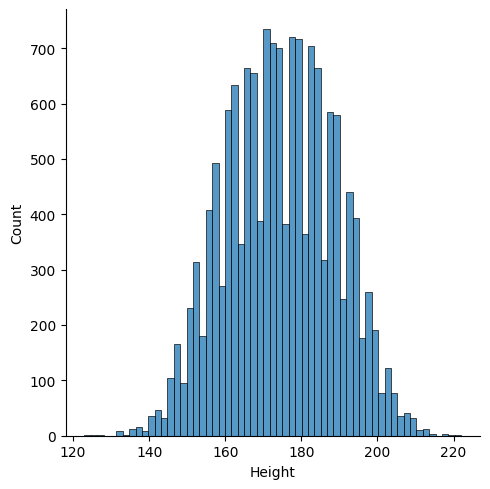

In [34]:
plt.figure(figsize=(4,4))
sns.displot(df['Height'])
plt.show()

             User_ID       Age    Height    Weight  Duration  Heart_Rate  \
User_ID     1.000000 -0.001827 -0.013520 -0.011603 -0.002751   -0.000457   
Age        -0.001827  1.000000  0.009554  0.090094  0.013247    0.010482   
Height     -0.013520  0.009554  1.000000  0.958451 -0.004625    0.000528   
Weight     -0.011603  0.090094  0.958451  1.000000 -0.001884    0.004311   
Duration   -0.002751  0.013247 -0.004625 -0.001884  1.000000    0.852869   
Heart_Rate -0.000457  0.010482  0.000528  0.004311  0.852869    1.000000   
Body_Temp   0.000923  0.013175  0.001200  0.004095  0.903167    0.771529   
Calories   -0.001661  0.154395  0.017537  0.035481  0.955421    0.897882   

            Body_Temp  Calories  
User_ID      0.000923 -0.001661  
Age          0.013175  0.154395  
Height       0.001200  0.017537  
Weight       0.004095  0.035481  
Duration     0.903167  0.955421  
Heart_Rate   0.771529  0.897882  
Body_Temp    1.000000  0.824558  
Calories     0.824558  1.000000  


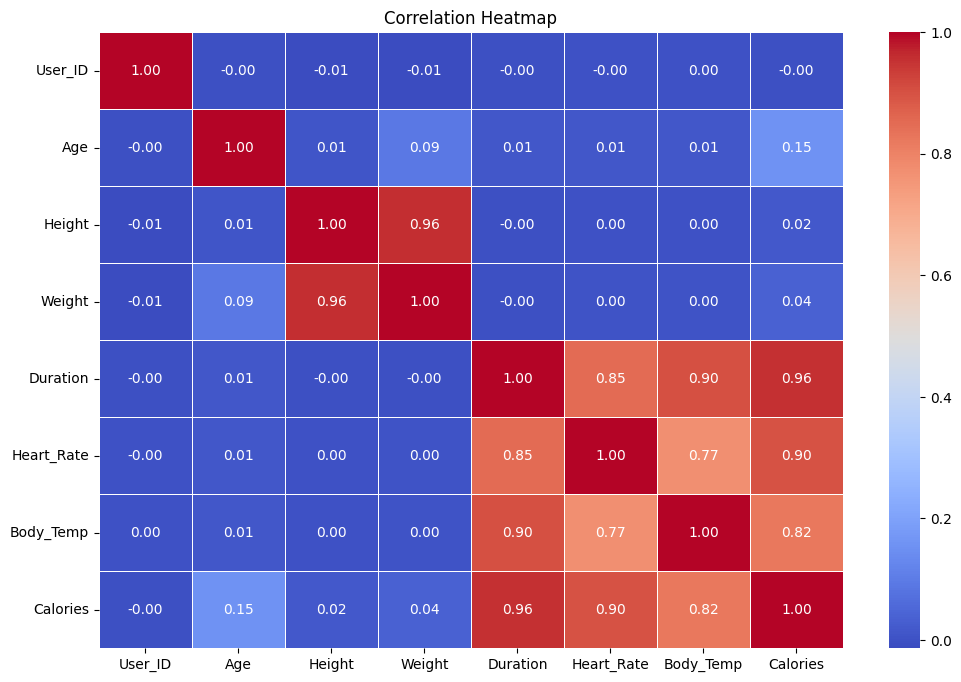

In [39]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler

# Define numerical features (excluding target variable)
numerical_features = ["Gender","Age","Height","Weight","Duration","Heart_Rate","Body_Temp","Calories"
]

# Standardize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

ValueError: could not convert string to float: 'male'